**Name: Sharon Zhou Student ID: 331116040**

### Question 1

The following code aims to model the stochastic age-structured model

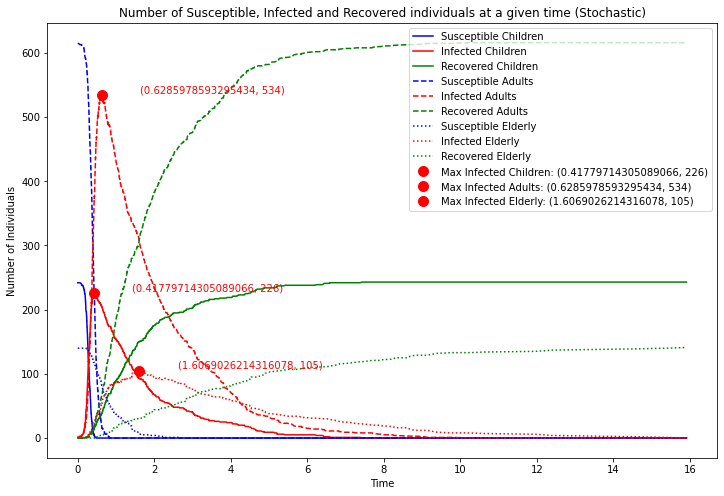

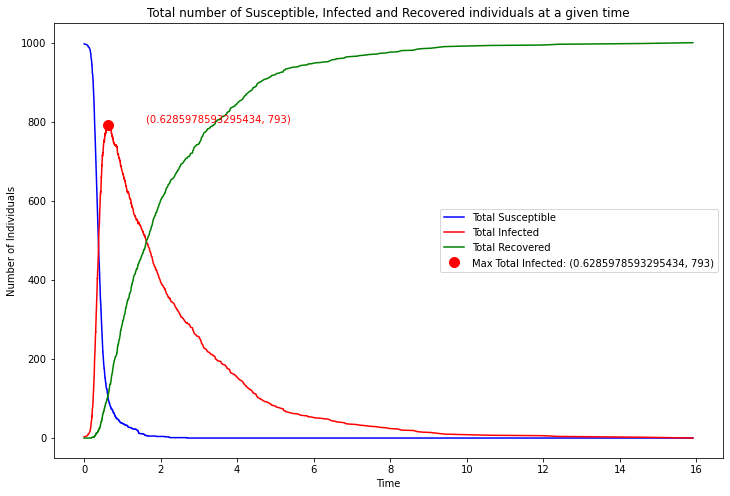

In [66]:


import numpy as np
import matplotlib.pyplot as plt

# Parameters
age_groups = 3  # Number of age groups: children (c), adults (a), elderly (e)
beta = np.array([0.8, 0.6, 0.4, 0.6, 0.7, 0.5, 0.4, 0.5, 0.6])  # Infection rates
gamma = np.array([0.7, 0.6, 0.3])  # Recovery rates
contact_matrix = np.array([
    [30, 10, 2],  # Contacts per child with [children, adults, elderly]
    [2, 20, 2],  # Contacts per adult with [children, adults, elderly]
    [2, 2, 2]    # Contacts per elderly with [children, adults, elderly]
])
S = np.array([242, 615, 140])  # Susceptible individuals in [children, adults, elderly]
I = np.array([1, 1, 1])        # Infected individuals in [children, adults, elderly]
R = np.array([0, 0, 0])        # Recovered individuals in [children, adults, elderly]
population = S + I + R

# Function to calculate propensities
def get_propensities(S, I, beta, gamma, contact_matrix, population):
    infection_rates = np.array([
        beta[0] * S[0] * contact_matrix[0, 0] * I[0] / population[0] + 
        beta[1] * S[0] * contact_matrix[0, 1] * I[1] / population[1] + 
        beta[2] * S[0] * contact_matrix[0, 2] * I[2] / population[2],
        beta[3] * S[1] * contact_matrix[1, 0] * I[0] / population[0] + 
        beta[4] * S[1] * contact_matrix[1, 1] * I[1] / population[1] + 
        beta[5] * S[1] * contact_matrix[1, 2] * I[2] / population[2],
        beta[6] * S[2] * contact_matrix[2, 0] * I[0] / population[0] + 
        beta[7] * S[2] * contact_matrix[2, 1] * I[1] / population[1] + 
        beta[8] * S[2] * contact_matrix[2, 2] * I[2] / population[2]
    ])
    recovery_rates = gamma * I
    return np.concatenate([infection_rates, recovery_rates])

# Gillespie simulation
def gillespie_simulation(S, I, R, beta, gamma, contact_matrix, population, t_max):
    time = 0
    times = [time]
    S_list = [S.copy()]
    I_list = [I.copy()]
    R_list = [R.copy()]
    S_list_tot = [np.sum(S)]
    I_list_tot = [np.sum(I)]
    R_list_tot = [np.sum(R)]

    while time < t_max and np.any(I > 0):
        propensities = get_propensities(S, I, beta, gamma, contact_matrix, population)
        total_rate = np.sum(propensities)
        if total_rate == 0:
            break
        delta_t = np.random.exponential(1 / total_rate)
        time += delta_t
        event_probabilities = propensities / total_rate
        event_index = np.random.choice(len(propensities), p=event_probabilities)
        if event_index < 3:
            S[event_index] -= 1
            I[event_index] += 1
        else:
            I[event_index - 3] -= 1
            R[event_index - 3] += 1
        times.append(time)
        S_list.append(S.copy())
        I_list.append(I.copy())
        R_list.append(R.copy())
        S_list_tot.append(np.sum(S))
        I_list_tot.append(np.sum(I))
        R_list_tot.append(np.sum(R))

    return np.array(times), np.array(S_list), np.array(I_list), np.array(R_list), np.array(S_list_tot), np.array(I_list_tot), np.array(R_list_tot)

# Plotting the results
def plot_results(times, S_array, I_array, R_array, S_tot, I_tot, R_tot):
    plt.figure(figsize=(12, 8))

    plt.plot(times, S_array[:, 0], 'b-', label='Susceptible Children')
    plt.plot(times, I_array[:, 0], 'r-', label='Infected Children')
    plt.plot(times, R_array[:, 0], 'g-', label='Recovered Children')
    plt.plot(times, S_array[:, 1], 'b--', label='Susceptible Adults')
    plt.plot(times, I_array[:, 1], 'r--', label='Infected Adults')
    plt.plot(times, R_array[:, 1], 'g--', label='Recovered Adults')
    plt.plot(times, S_array[:, 2], 'b:', label='Susceptible Elderly')
    plt.plot(times, I_array[:, 2], 'r:', label='Infected Elderly')
    plt.plot(times, R_array[:, 2], 'g:', label='Recovered Elderly')

    # Mark the highest points
    max_I_children = np.max(I_array[:, 0])
    max_I_adults = np.max(I_array[:, 1])
    max_I_elderly = np.max(I_array[:, 2])

    max_I_children_time = times[np.argmax(I_array[:, 0])]
    max_I_adults_time = times[np.argmax(I_array[:, 1])]
    max_I_elderly_time = times[np.argmax(I_array[:, 2])]

    plt.plot(max_I_children_time, max_I_children, 'ro', markersize=10, label=f'Max Infected Children: ({max_I_children_time}, {max_I_children})')
    plt.plot(max_I_adults_time, max_I_adults, 'ro', markersize=10, label=f'Max Infected Adults: ({max_I_adults_time}, {max_I_adults})')
    plt.plot(max_I_elderly_time, max_I_elderly, 'ro', markersize=10, label=f'Max Infected Elderly: ({max_I_elderly_time}, {max_I_elderly})')

    # Annotate the points with their coordinates
    plt.text(max_I_children_time + 1, max_I_children, f'({max_I_children_time}, {max_I_children})', verticalalignment='bottom', horizontalalignment='left', color='red')
    plt.text(max_I_adults_time + 1, max_I_adults, f'({max_I_adults_time}, {max_I_adults})', verticalalignment='bottom', horizontalalignment='left', color='red')
    plt.text(max_I_elderly_time + 1, max_I_elderly, f'({max_I_elderly_time}, {max_I_elderly})', verticalalignment='bottom', horizontalalignment='left', color='red')

    plt.xlabel('Time')
    plt.ylabel('Number of Individuals')
    plt.title('Number of Susceptible, Infected and Recovered individuals at a given time (Stochastic)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(times, S_tot, 'b-', label='Total Susceptible')
    plt.plot(times, I_tot, 'r-', label='Total Infected')
    plt.plot(times, R_tot, 'g-', label='Total Recovered')

    # Mark the highest points
    max_I_tot = np.max(I_tot)
    max_I_tot_time = times[np.argmax(I_tot)]

    plt.plot(max_I_tot_time, max_I_tot, 'ro', markersize=10, label=f'Max Total Infected: ({max_I_tot_time}, {max_I_tot})')

    # Annotate the points with their coordinates
    plt.text(max_I_tot_time + 1, max_I_tot, f'({max_I_tot_time}, {max_I_tot})', verticalalignment='bottom', horizontalalignment='left', color='red')

    plt.xlabel('Time')
    plt.ylabel('Number of Individuals')
    plt.title('Total number of Susceptible, Infected and Recovered individuals at a given time')
    plt.legend()
    plt.show()

# Run the simulation and plot results
t_max = 100  # Define the maximum time for the simulation
times, S_array, I_array, R_array, S_tot, I_tot, R_tot = gillespie_simulation(S, I, R, beta, gamma, contact_matrix, population, t_max)
plot_results(times, S_array, I_array, R_array, S_tot, I_tot, R_tot)


Plots just the elderly individuals within the age-structured sir model

Text(0.5, 1.0, 'Total number of Susceptible, Infected and Recovered elderly individuals at a given time')

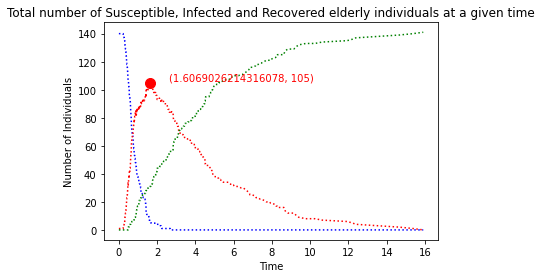

In [68]:

plt.plot(times, S_array[:, 2], 'b:', label='Susceptible Elderly')
plt.plot(times, I_array[:, 2], 'r:', label='Infected Elderly')
plt.plot(times, R_array[:, 2], 'g:', label='Recovered Elderly')
max_I_elderly = np.max(I_array[:, 2])
max_I_elderly_time = times[np.argmax(I_array[:, 2])]
plt.plot(max_I_elderly_time, max_I_elderly, 'ro', markersize=10, label=f'Max Infected Elderly: ({max_I_elderly_time}, {max_I_elderly})')
plt.text(max_I_elderly_time + 1, max_I_elderly, f'({max_I_elderly_time}, {max_I_elderly})', verticalalignment='bottom', horizontalalignment='left', color='red')

plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('Total number of Susceptible, Infected and Recovered elderly individuals at a given time')

Models SIR model containing homogenous populations 

In [71]:
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate propensities
def get_propensities_one_population(S, I, beta, gamma, contact_matrix, population):
    infection_rates = np.array([
        beta[0] * S[0] * contact_matrix[0, 0] * I[0] / population[0]
    ])
    recovery_rates = gamma * I
    return np.concatenate([infection_rates, recovery_rates])

# Gillespie simulation
def gillespie_simulation_one_population(S, I, R, beta, gamma, contact_matrix, population, t_max):
    time = 0
    times = [time]
    S_list = [S.copy()]
    I_list = [I.copy()]
    R_list = [R.copy()]
    S_list_tot = [np.sum(S)]
    I_list_tot = [np.sum(I)]
    R_list_tot = [np.sum(R)]

    while time < t_max and np.any(I > 0):
        propensities = get_propensities_one_population(S, I, beta, gamma, contact_matrix, population)
        total_rate = np.sum(propensities)
        if total_rate == 0:
            break
        delta_t = np.random.exponential(1 / total_rate)
        time += delta_t
        event_probabilities = propensities / total_rate
        event_index = np.random.choice(len(propensities), p=event_probabilities)
        if event_index < 1:
            S[event_index] -= 1
            I[event_index] += 1
        else:
            I[event_index - 1] -= 1
            R[event_index - 1] += 1
        times.append(time)
        S_list.append(S.copy())
        I_list.append(I.copy())
        R_list.append(R.copy())
        S_list_tot.append(np.sum(S))
        I_list_tot.append(np.sum(I))
        R_list_tot.append(np.sum(R))

    return np.array(times), np.array(S_list), np.array(I_list), np.array(R_list), np.array(S_list_tot), np.array(I_list_tot), np.array(R_list_tot)

# Plotting the results
def plot_results_one_population(times, S_array, I_array, R_array, S_tot, I_tot, R_tot):
    plt.figure(figsize=(12, 8))
    plt.plot(times, S_tot, 'b-', label='Total Susceptible')
    plt.plot(times, I_tot, 'r-', label='Total Infected')
    plt.plot(times, R_tot, 'g-', label='Total Recovered')

    # Mark the highest point for total infected individuals
    max_I_tot = np.max(I_tot)
    max_I_tot_time = times[np.argmax(I_tot)]
    plt.plot(max_I_tot_time, max_I_tot, 'ro', markersize=10, label=f'Max Total Infected: ({max_I_tot_time:.2f}, {max_I_tot})')
    plt.text(max_I_tot_time, max_I_tot + 5, f'({max_I_tot_time:.2f}, {max_I_tot})', verticalalignment='bottom', horizontalalignment='left', color='red')

    plt.xlabel('Time')
    plt.ylabel('Number of Individuals')
    plt.title('Total number of Susceptible, Infected and Recovered individuals at a given time')
    plt.legend()
    plt.show()



Homogenous population of adults SIR simulation

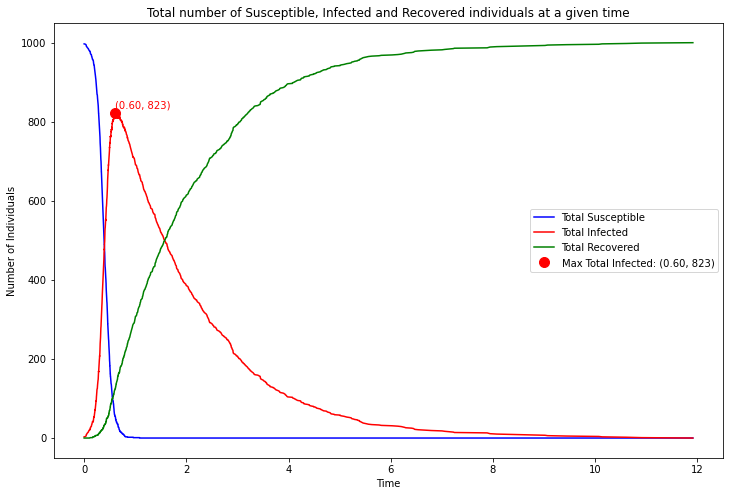

In [72]:

beta = np.array([0.7]) 
gamma = np.array([0.6])  
contact_matrix = np.array([
    [20]  # Contacts per adult with adults
])
S = np.array([997])  # Susceptible adults
I = np.array([3])    # Infected adults
R = np.array([0])    # Recovered adults
population = S + I + R

# Run the simulation
t_max = 100
times, S_array, I_array, R_array, S_tot, I_tot, R_tot = gillespie_simulation_one_population(S, I, R, beta, gamma, contact_matrix, population, t_max)

# Plot the results
plot_results_one_population(times, S_array, I_array, R_array, S_tot, I_tot, R_tot)


Homogenous population of adults SIR simulation

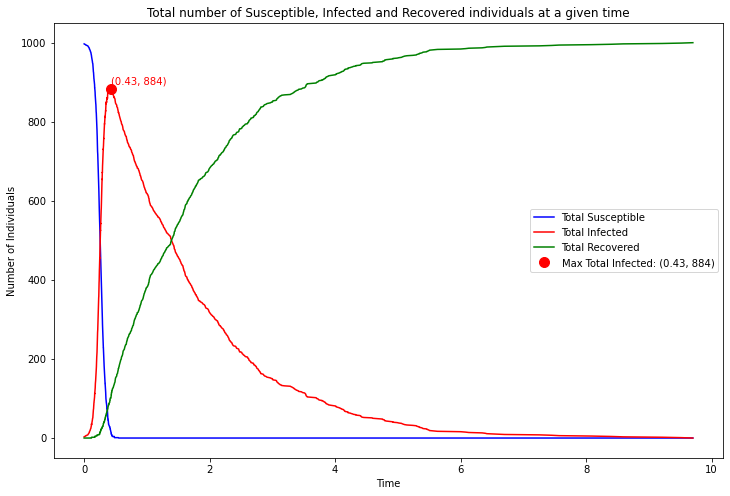

In [75]:

beta = np.array([0.8])  # Infection rates for children
gamma = np.array([0.7])  # Recovery rates for children
contact_matrix = np.array([
    [30]  # Contacts per adult with adults
])
S = np.array([997])  # Susceptible children
I = np.array([3])    # Infected children
R = np.array([0])    # Recovered children
population = S + I + R

t_max = 100
times, S_array, I_array, R_array, S_tot, I_tot, R_tot = gillespie_simulation_one_population(S, I, R, beta, gamma, contact_matrix, population, t_max)

# Plot the results
plot_results_one_population(times, S_array, I_array, R_array, S_tot, I_tot, R_tot)

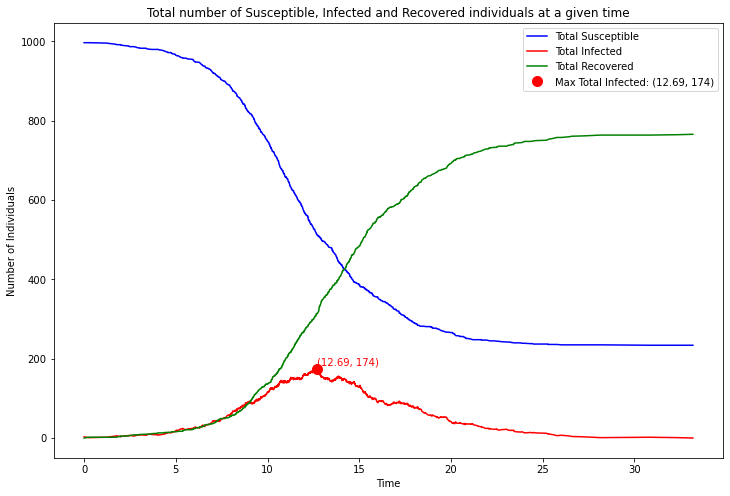

In [76]:
beta = np.array([0.9])  # Infection rates for elderly
gamma = np.array([0.5])  # Recovery rates for elderly
contact_matrix = np.array([
    [1]  # Contacts per elderly with elderly
])
S = np.array([997])  # Susceptible 
I = np.array([3])    # Infected 
R = np.array([0])    # Recovered
population = S + I + R

t_max = 100
times, S_array, I_array, R_array, S_tot, I_tot, R_tot = gillespie_simulation_one_population(S, I, R, beta, gamma, contact_matrix, population, t_max)

# Plot the results
plot_results_one_population(times, S_array, I_array, R_array, S_tot, I_tot, R_tot)

### Question 2 plots

Code used to find the optimal vaccination strategy, for both mass vaccinations and targeted vaccinations. This plots a bar graph comparing the two vaccination strategies and their vaccine coverages

Best strategy for mass vaccination: (0.2, 0.0, 0.0, 0.0)
Maximized population coverage for mass vaccination: 360.0
Minimized infectious cases for mass vaccination: 25.766641830439838
Best strategy for targeted vaccination: (0.0, 1.0, 0.2, 0.08333333333333333)
Maximized population coverage for targeted vaccination: 725.0
Minimized infectious cases for targeted vaccination: 6.611646031255915


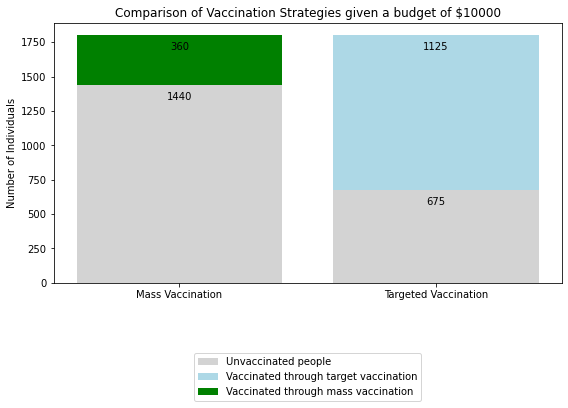

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_A = 1000  # Number of adults
N_C = 500   # Number of children
N_E = 300   # Number of elderly

c_A = 20    # Cost to vaccinate one adult
c_C = 10    # Cost to vaccinate one child
c_E = 30    # Cost to vaccinate one elderly

budget = 10000 # Total budget available for vaccinations

# SIR model parameters
beta1, beta2, beta3 = 0.8, 0.6, 0.4  # Infection rates for children
beta4, beta5, beta6 = 0.6, 0.7, 0.5  # Infection rates for adults
beta7, beta8, beta9 = 0.4, 0.5, 0.6  # Infection rates for elderly
gamma1, gamma2, gamma3 = 0.07, 0.06, 0.03  # Recovery rates

# Initial conditions
I0_C, I0_A, I0_E = 1, 1, 1
R0_C, R0_A, R0_E = 0, 0, 0
S0_C = N_C - I0_C - R0_C

S0_A = N_A - I0_A - R0_A
S0_E = N_E - I0_E - R0_E

# Function to simulate extended SIR model
def sir_model(beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, gamma1, gamma2, gamma3, S0_C, S0_A, S0_E, I0_C, I0_A, I0_E, R0_C, R0_A, R0_E, days, p_mass=0, x_A=0, x_C=0, x_E=0):
    S_C, I_C, R_C = [S0_C], [I0_C], [R0_C]
    S_A, I_A, R_A = [S0_A], [I0_A], [R0_A]
    S_E, I_E, R_E = [S0_E], [I0_E], [R0_E]
    
    for day in range(days):
        new_infections_C = beta1 * S_C[-1] * I_C[-1] / (N_C + N_A + N_E) + beta2 * S_C[-1] * I_A[-1] / (N_C + N_A + N_E) + beta3 * S_C[-1] * I_E[-1] / (N_C + N_A + N_E)
        new_infections_A = beta4 * S_A[-1] * I_C[-1] / (N_C + N_A + N_E) + beta5 * S_A[-1] * I_A[-1] / (N_C + N_A + N_E) + beta6 * S_A[-1] * I_E[-1] / (N_C + N_A + N_E)
        new_infections_E = beta7 * S_E[-1] * I_C[-1] / (N_C + N_A + N_E) + beta8 * S_E[-1] * I_A[-1] / (N_C + N_A + N_E) + beta9 * S_E[-1] * I_E[-1] / (N_C + N_A + N_E)
        
        new_recoveries_C = gamma1 * I_C[-1]
        new_recoveries_A = gamma2 * I_A[-1]
        new_recoveries_E = gamma3 * I_E[-1]
        
        S_C.append(S_C[-1] - new_infections_C)
        I_C.append(I_C[-1] + new_infections_C - new_recoveries_C)
        R_C.append(R_C[-1] + new_recoveries_C)
        
        S_A.append(S_A[-1] - new_infections_A)
        I_A.append(I_A[-1] + new_infections_A - new_recoveries_A)
        R_A.append(R_A[-1] + new_recoveries_A)
        
        S_E.append(S_E[-1] - new_infections_E)
        I_E.append(I_E[-1] + new_infections_E - new_recoveries_E)
        R_E.append(R_E[-1] + new_recoveries_E)
        
    return S_C, I_C, R_C, S_A, I_A, R_A, S_E, I_E, R_E

# Function utilised in order to compute total cost of vaccination strategy
def compute_vaccination_cost(p_mass, x_A, x_C, x_E):
    total_cost_mass = p_mass * (N_A * c_A + N_C * c_C + N_E * c_E)
    total_cost_targeted = x_A * N_A * c_A + x_C * N_C * c_C + x_E * N_E * c_E
    return total_cost_mass, total_cost_targeted

# Heuristic approach to compare strategies
def compare_vaccination_strategies(budget):
    best_strategy_mass = None
    max_population_coverage_mass = 0
    min_infectious_cases_mass = float('inf')
    
    best_strategy_targeted = None
    max_population_coverage_targeted = 0
    min_infectious_cases_targeted = float('inf')
    it = []
    im = []
    # Try different proportions of mass vaccination (p_mass) and targeted vaccination (x_A, x_C, x_E)
    for p_mass in np.linspace(0, 1, 11):
        for x_A in np.linspace(0, 1, 11):
            for x_C in np.linspace(0, 1, 11):
                for x_E in np.linspace(0, 1, 25):
                    total_cost_mass, total_cost_target = compute_vaccination_cost(p_mass, x_A, x_C, x_E)
                    if total_cost_mass <= budget and total_cost_target <= budget:
                        # Calculate total population coverage
                        coverage_mass = p_mass * (N_A + N_C + N_E)
                        coverage_targeted = x_A * N_A + x_C * N_C + x_E * N_E

                        # Simulate SIR dynamics for mass vaccination
                        S_mass_C, I_mass_C, R_mass_C, S_mass_A, I_mass_A, R_mass_A, S_mass_E, I_mass_E, R_mass_E= sir_model(beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, gamma1, gamma2, gamma3, S0_C *
                                                    (1 - p_mass), S0_A * (1 - p_mass), S0_E * (1 - p_mass), I0_C, I0_A, I0_E, R0_C, R0_A, R0_E, days, p_mass)
                        infections_mass = I_mass_C[-1] + I_mass_A[-1] + I_mass_E[-1]
                    

                        # Simulate SIR dynamics for targeted vaccination
                        S_targeted_C, I_targeted_C, R_targeted_C, S_targeted_A, I_targeted_A, R_targeted_A, S_targeted_E, I_targeted_E, R_targeted_E = sir_model(beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, gamma1, gamma2, gamma3, S0_C * (1 - x_C), S0_A * (1 - x_A), S0_E * (1 - x_E), I0_C, I0_A, I0_E, R0_C, R0_A, R0_E, days, x_A, x_C, x_E)
                        infections_targeted = I_targeted_C[-1] + I_targeted_A[-1] + I_targeted_E[-1]
                        
                        if coverage_mass > max_population_coverage_mass:
                            max_population_coverage_mass = coverage_mass
                            best_strategy_mass = (p_mass, x_C, x_A, x_E)
                            if infections_mass < min_infectious_cases_mass:
                                min_infectious_cases_mass = infections_mass
                        
                        if coverage_targeted > max_population_coverage_targeted:
                            max_population_coverage_targeted = coverage_targeted
                            best_strategy_targeted = (p_mass, x_C, x_A, x_E)
                            if infections_targeted < min_infectious_cases_targeted:
                                min_infectious_cases_targeted = infections_targeted
    
    return best_strategy_mass, max_population_coverage_mass, min_infectious_cases_mass, best_strategy_targeted, max_population_coverage_targeted, min_infectious_cases_targeted

# Simulation setup
days = 100

# Compare strategies using heuristics
best_strategy_mass, max_population_coverage_mass, min_infectious_cases_mass, best_strategy_targeted, max_population_coverage_targeted, min_infectious_cases_targeted = compare_vaccination_strategies(budget)
p_mass, x_C, x_A, x_E = best_strategy_mass
p_mass_1, x_C, x_A, x_E = best_strategy_targeted


print("Best strategy for mass vaccination:", best_strategy_mass)
print("Maximized population coverage for mass vaccination:", max_population_coverage_mass)
print("Minimized infectious cases for mass vaccination:", min_infectious_cases_mass)

print("Best strategy for targeted vaccination:", best_strategy_targeted)
print("Maximized population coverage for targeted vaccination:", max_population_coverage_targeted)
print("Minimized infectious cases for targeted vaccination:", min_infectious_cases_targeted)



population = N_A + N_C + N_E

# Proportions of vaccinated individuals for mass and targeted vaccination strategies
p_mass = best_strategy_mass[0]
p_targeted_A = best_strategy_targeted[1]
p_targeted_C = best_strategy_targeted[2]
p_targeted_E = best_strategy_targeted[3]

# Calculate the number of vaccinated individuals
vaccinated_mass = p_mass * population
vaccinated_targeted = p_targeted_A * N_A + p_targeted_C * N_C + p_targeted_E * N_E

# Calculate the number of unvaccinated individuals
unvaccinated_mass = population - vaccinated_mass
unvaccinated_targeted = population - vaccinated_targeted

# Plotting the stacked bar graph
labels = ['Mass Vaccination', 'Targeted Vaccination']
vaccinated_numbers = [vaccinated_mass, vaccinated_targeted]
unvaccinated_numbers = [unvaccinated_mass, unvaccinated_targeted]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for vaccinated and unvaccinated
bar1 = ax.bar(labels, unvaccinated_numbers, color='lightgray', label='Unvaccinated people')
bar2 = ax.bar(labels, vaccinated_numbers, bottom=unvaccinated_numbers, color=['lightblue', 'green'], label='Vaccinated through target vaccination')
bar2 = ax.bar(labels, vaccinated_numbers, bottom=unvaccinated_numbers, color=['green', 'lightblue'], label='Vaccinated through mass vaccination ')

# Add labels on the bars
for i, bar in enumerate(bar1):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval - 50, f'{int(yval)}', ha='center', va='top', color='black', fontsize=10)

for i, bar in enumerate(bar2):
    yval = bar.get_height() + unvaccinated_numbers[i]
    ax.text(bar.get_x() + bar.get_width() / 2, yval - 50, f'{int(bar.get_height())}', ha='center', va='top', color='black', fontsize=10)


# Adjust legend position further down
ax.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=1)

ax.set_ylabel('Number of Individuals')
ax.set_title(f'Comparison of Vaccination Strategies given a budget of ${budget}')

plt.tight_layout()
plt.show()






Code to graph cost effectiveness of mass vaccination model

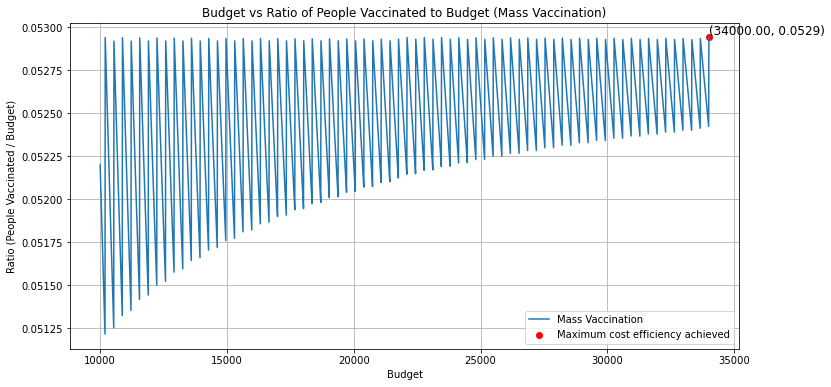

The budget that maximizes the ratio of people vaccinated to budget is $34000.00
The maximum ratio is 0.0529


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_A = 1000  # Number of adults
N_C = 500   # Number of children
N_E = 300   # Number of elderly

c_A = 20    # Cost to vaccinate one adult
c_C = 10    # Cost to vaccinate one child
c_E = 30    # Cost to vaccinate one elderly


# Initial conditions
I0_C, I0_A, I0_E = 1, 1, 1
R0_C, R0_A, R0_E = 0, 0, 0
S0_C = N_C - I0_C - R0_C
S0_A = N_A - I0_A - R0_A
S0_E = N_E - I0_E - R0_E

# Number of days to simulate
days = 160


# Function to compute total cost of vaccination strategy
def compute_vaccination_cost(p_mass):
    return p_mass * (N_A * c_A + N_C * c_C + N_E * c_E)

# Heuristic approach to compare strategies
def compare_vaccination_strategies(budget):
    best_strategy_mass = None
    max_population_coverage_mass = 0
    min_infectious_cases_mass = float('inf')
    
    # Try different proportions of mass vaccination (p_mass)
    for p_mass in np.linspace(0, 1, 101):
        total_cost_mass = compute_vaccination_cost(p_mass)
        if total_cost_mass <= budget:
            # Calculate total population coverage
            coverage_mass = p_mass * (N_A + N_C + N_E)

            # Simulate SIR dynamics for mass vaccination
            S_mass_C, I_mass_C, R_mass_C, S_mass_A, I_mass_A, R_mass_A, S_mass_E, I_mass_E, R_mass_E = sir_model(beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, gamma1, gamma2, gamma3, S0_C * (1 - p_mass), S0_A * (1 - p_mass), S0_E * (1 - p_mass), I0_C, I0_A, I0_E, R0_C, R0_A, R0_E, days, p_mass)
            infections_mass = I_mass_C[-1] + I_mass_A[-1] + I_mass_E[-1]
            
            if coverage_mass > max_population_coverage_mass:
                max_population_coverage_mass = coverage_mass
                best_strategy_mass = p_mass
                if infections_mass < min_infectious_cases_mass:
                    min_infectious_cases_mass = infections_mass
    
    return best_strategy_mass, max_population_coverage_mass, min_infectious_cases_mass

# Graph the different budgets against the ratio of the number of people vaccinated to the budget
budget_range = np.linspace(10000, 34000, 3000)  # Define the budget range to search
ratios_mass = []

for budget in budget_range:
    best_strategy_mass, max_population_coverage_mass, min_infectious_cases_mass = compare_vaccination_strategies(budget)
    
    ratio_mass = max_population_coverage_mass / budget
    ratios_mass.append(ratio_mass)

# Find the index of the maximum ratio
max_index = np.argmax(ratios_mass)
max_budget = budget_range[max_index]
max_ratio = ratios_mass[max_index]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(budget_range, ratios_mass, label='Mass Vaccination')
plt.scatter(max_budget, max_ratio, color='red', label = "Maximum cost efficiency achieved")  # Highlight the maximum point
plt.text(max_budget, max_ratio, f'({max_budget:.2f}, {max_ratio:.4f})', fontsize=12, verticalalignment='bottom')
plt.xlabel('Budget')
plt.ylabel('Ratio (People Vaccinated / Budget)')
plt.title('Budget vs Ratio of People Vaccinated to Budget (Mass Vaccination)')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum point
print(f'The budget that maximizes the ratio of people vaccinated to budget is ${max_budget:.2f}')
print(f'The maximum ratio is {max_ratio:.4f}')


Code to graph cost effectiveness of targeted vaccination model

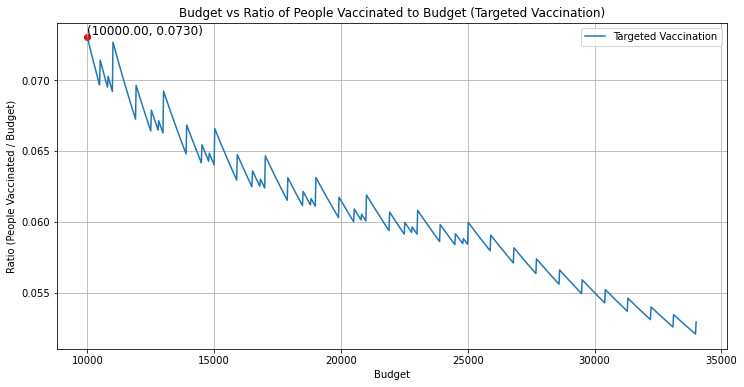

The budget that maximizes the ratio of people vaccinated to budget is $10000.00
The maximum ratio is 0.0730


In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_A = 1000  # Number of adults
N_C = 500   # Number of children
N_E = 300   # Number of elderly

c_A = 20    # Cost to vaccinate one adult
c_C = 10    # Cost to vaccinate one child
c_E = 30    # Cost to vaccinate one elderly


# Initial conditions
I0_C, I0_A, I0_E = 1, 1, 1
R0_C, R0_A, R0_E = 0, 0, 0
S0_C = N_C - I0_C - R0_C
S0_A = N_A - I0_A - R0_A
S0_E = N_E - I0_E - R0_E

# Number of days to simulate
days = 160


# Function to compute total cost of vaccination strategy
def compute_vaccination_cost(x_A, x_C, x_E):
    return x_A * N_A * c_A + x_C * N_C * c_C + x_E * N_E * c_E

# Heuristic approach to compare strategies
def compare_vaccination_strategies(budget):
    best_strategy_targeted = None
    max_population_coverage_targeted = 0
    min_infectious_cases_targeted = float('inf')
    
    # Heuristic grid search to different proportions (x_A, x_C, x_E)
    for x_A in np.linspace(0, 1, 11):
        for x_C in np.linspace(0, 1, 11):
            for x_E in np.linspace(0, 1, 11):
                total_cost_target = compute_vaccination_cost(x_A, x_C, x_E)
                if total_cost_target <= budget:
                    # Calculate total population coverage
                    coverage_targeted = x_A * N_A + x_C * N_C + x_E * N_E

                    # Simulate SIR dynamics for targeted vaccination
                    S_targeted_C, I_targeted_C, R_targeted_C, S_targeted_A, I_targeted_A, R_targeted_A, S_targeted_E, I_targeted_E, R_targeted_E = sir_model(beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, gamma1, gamma2, gamma3, S0_C * (1 - x_C), S0_A * (1 - x_A), S0_E * (1 - x_E), I0_C, I0_A, I0_E, R0_C, R0_A, R0_E, days, x_A, x_C, x_E)
                    infections_targeted = I_targeted_C[-1] + I_targeted_A[-1] + I_targeted_E[-1]
                    
                    if coverage_targeted > max_population_coverage_targeted:
                        max_population_coverage_targeted = coverage_targeted
                        best_strategy_targeted = (x_A, x_C, x_E)
                        if infections_targeted < min_infectious_cases_targeted:
                            min_infectious_cases_targeted = infections_targeted
    
    return best_strategy_targeted, max_population_coverage_targeted, min_infectious_cases_targeted

# Graph the different budgets against the ratio of the number of people vaccinated to the budget
budget_range = np.linspace(10000, 34000, 1000)  # Define the budget range to search
ratios_targeted = []

for budget in budget_range:
    best_strategy_targeted, max_population_coverage_targeted, min_infectious_cases_targeted = compare_vaccination_strategies(budget)
    
    ratio_targeted = max_population_coverage_targeted / budget
    ratios_targeted.append(ratio_targeted)

# Find the index of the maximum ratio
max_index = np.argmax(ratios_targeted)
max_budget = budget_range[max_index]
max_ratio = ratios_targeted[max_index]


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(budget_range, ratios_targeted, label='Targeted Vaccination')
plt.scatter(max_budget, max_ratio, color='red')  # Highlight the maximum point
plt.text(max_budget, max_ratio, f'({max_budget:.2f}, {max_ratio:.4f})', fontsize=12, verticalalignment='bottom', label = "Maximum cost efficiency achieved")
plt.xlabel('Budget')
plt.ylabel('Ratio (People Vaccinated / Budget)')
plt.title('Budget vs Ratio of People Vaccinated to Budget (Targeted Vaccination)')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum point
print(f'The budget that maximizes the ratio of people vaccinated to budget is ${max_budget:.2f}')
print(f'The maximum ratio is {max_ratio:.4f}')


Code to graph heat maps containing information on optimal combinations of proportions to gain maximum coverage

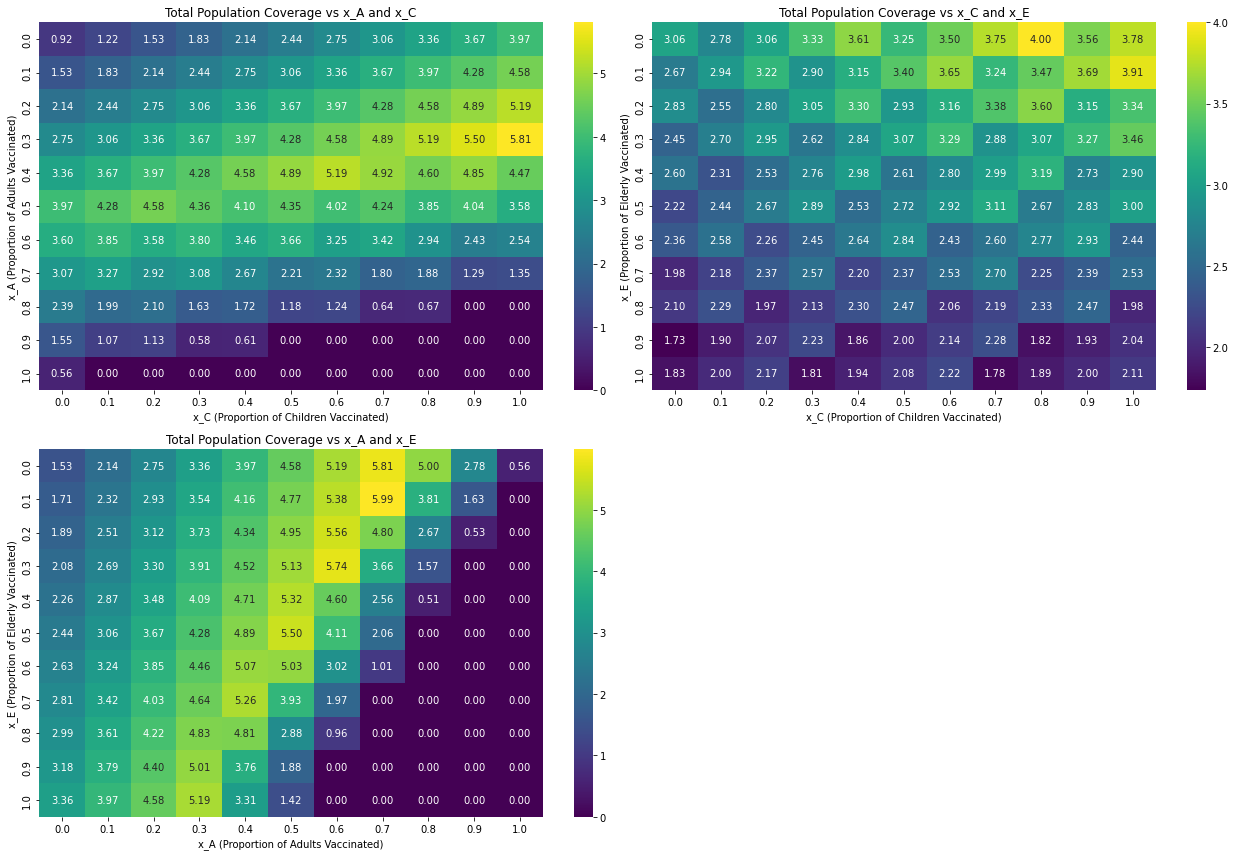

Maximum Coverage: 68.33%
Best Strategy (x_A, x_C, x_E): (0.7, 1.0, 0.1)


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
N_A = 1000  # Number of adults
N_C = 500   # Number of children
N_E = 300   # Number of elderly

c_A = 20    # Cost to vaccinate one adult
c_C = 10    # Cost to vaccinate one child
c_E = 30    # Cost to vaccinate one elderly

# Number of days to simulate
days = 160

# Initial conditions
I0_C, I0_A, I0_E = 1, 1, 1
R0_C, R0_A, R0_E = 0, 0, 0
S0_C = N_C - I0_C - R0_C
S0_A = N_A - I0_A - R0_A
S0_E = N_E - I0_E - R0_E

budget = 10000 # Total budget available for vaccinations

# Function to compute total cost of vaccination strategy
def compute_targeted_vaccination_cost(x_A, x_C, x_E):
    return x_A * N_A * c_A + x_C * N_C * c_C + x_E * N_E * c_E

# Function to compare vaccination strategies and return coverage matrix, max coverage, and best strategy
def compare_targeted_vaccination_strategies(budget):
    coverages = np.zeros((len(x_A_range), len(x_C_range), len(x_E_range)))
    
    # Try different proportions of targeted vaccination (x_A, x_C, x_E)
    for i, x_A in enumerate(x_A_range):
        for j, x_C in enumerate(x_C_range):
            for k, x_E in enumerate(x_E_range):
                total_cost_target = compute_targeted_vaccination_cost(x_A, x_C, x_E)
                if total_cost_target <= budget:
                    coverage_targeted = x_A * N_A + x_C * N_C + x_E * N_E
                    population = N_A + N_C + N_E
                    coverage = coverage_targeted/population
                    coverages[i, j, k] = coverage
                    
    max_coverage = np.max(coverages)  # Find the maximum coverage achieved
    best_strategy_indices = np.unravel_index(np.argmax(coverages), coverages.shape)
    best_strategy = (x_A_range[best_strategy_indices[0]], x_C_range[best_strategy_indices[1]], x_E_range[best_strategy_indices[2]])
    return coverages, max_coverage, best_strategy

# Create a grid of x_A, x_C, x_E values
x_A_range = np.round(np.linspace(0, 1, 11), 1)
x_C_range = np.round(np.linspace(0, 1, 11), 1)
x_E_range = np.round(np.linspace(0, 1, 11), 1)

# Compute coverage matrix and find best strategy
coverage_matrix, max_coverage, best_strategy = compare_targeted_vaccination_strategies(20000)
# Plotting with Seaborn
plt.figure(figsize=(18, 12))

# Plot Adult vs children heatmap
plt.subplot(2, 2, 1)
sns.heatmap(coverage_matrix.sum(axis=2), annot=True, fmt='.2f', cmap='viridis', xticklabels=x_C_range, yticklabels=x_A_range)
plt.xlabel('x_C (Proportion of Children Vaccinated)')
plt.ylabel('x_A (Proportion of Adults Vaccinated)')
plt.title('Total Population Coverage vs x_A and x_C')
plt.tight_layout()

# Plot Children vs elderly heat map
plt.subplot(2, 2, 2)
sns.heatmap(coverage_matrix.sum(axis=0).T, annot=True, fmt='.2f', cmap='viridis', xticklabels=x_C_range, yticklabels=x_E_range)
plt.xlabel('x_C (Proportion of Children Vaccinated)')
plt.ylabel('x_E (Proportion of Elderly Vaccinated)')
plt.title('Total Population Coverage vs x_C and x_E')
plt.tight_layout()

# Plot Adult vs elderly heat map
plt.subplot(2, 2, 3)
sns.heatmap(coverage_matrix.sum(axis=1).T, annot=True, fmt='.2f', cmap='viridis', xticklabels=x_A_range, yticklabels=x_E_range)
plt.xlabel('x_A (Proportion of Adults Vaccinated)')
plt.ylabel('x_E (Proportion of Elderly Vaccinated)')
plt.title('Total Population Coverage vs x_A and x_E')
plt.tight_layout()

plt.show()

print(f"Maximum Coverage: {max_coverage:.2%}")
print(f"Best Strategy (x_A, x_C, x_E): {best_strategy}")


RK2 model of SIR model

In [1]:

def ode_system_2(t, y, beta, gamma, delta, epsilon, omega):
    S, I, R = y
    
    dS_dt = - (beta * S * I) - (delta * epsilon * S) + (omega * R)
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I + delta * epsilon * S - omega * R
    
    return np.array([dS_dt, dI_dt, dR_dt])

In [2]:


def SIR_RK2_extension(f, t, y0, params, dt):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1], *params) * dt
        k2 = f(t[i-1] + dt, y[i-1] + k1, *params) * dt
        y[i] = y[i-1] + 0.5 * (k1 + k2)
    return y




def SIR_RK2_extension_plot(f, t, y0, params):
    dt = t[1] - t[0]
    solution = SIR_RK2_extension(f, t, y0, params, dt)
    
    # Find maximum and minimum points for each curve
    max_S_index = np.argmax(solution[:, 0])
    max_I_index = np.argmax(solution[:, 1])
    max_R_index = np.argmax(solution[:, 2])
    
    min_S_index = np.argmin(solution[:, 0])
    min_I_index = np.argmin(solution[:, 1])
    min_R_index = np.argmin(solution[:, 2])
    
    plt.plot(t[max_S_index], solution[max_S_index, 0], 'o', color='orange')
    plt.plot(t[max_I_index], solution[max_I_index, 1], 'go')
    plt.plot(t[max_R_index], solution[max_R_index, 2], 'ro')
    
    plt.plot(t[min_S_index], solution[min_S_index, 0], 'o', color='orange')
    plt.plot(t[min_I_index], solution[min_I_index, 1], 'go')
    plt.plot(t[min_R_index], solution[min_R_index, 2], 'ro')
    
    
     # Annotate maximum points
    plt.text(t[max_S_index], solution[max_S_index, 0], f'Max S: ({t[max_S_index]:.2f}, {solution[max_S_index, 0]:.2f})', verticalalignment='bottom')
    plt.text(t[max_I_index], solution[max_I_index, 1], f'Max I: ({t[max_I_index]:.2f}, {solution[max_I_index, 1]:.2f})', verticalalignment='top')
    plt.text(t[max_R_index], solution[max_R_index, 2], f'Max R: ({t[max_R_index]:.2f}, {solution[max_R_index, 2]:.2f})', verticalalignment='top')
    
    # Annotate minimum points
    plt.text(t[min_S_index], solution[min_S_index, 0], f'Min S: ({t[min_S_index]:.2f}, {solution[min_S_index, 0]:.2f})', verticalalignment='top')
    plt.text(t[min_I_index], solution[min_I_index, 1], f'Min I: ({t[min_I_index]:.2f}, {solution[min_I_index, 1]:.2f})', verticalalignment='bottom')
    plt.text(t[min_R_index], solution[min_R_index, 2], f'Min R: ({t[min_R_index]:.2f}, {solution[min_R_index, 2]:.2f})', verticalalignment='bottom')
    
    plt.plot(t, solution[:, 0], label='S(t)', color = 'orange')
    plt.plot(t, solution[:, 1], label='I(t)', color = 'green')
    plt.plot(t, solution[:, 2], label='R(t)', color = 'red')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('RK2 Solution of SIR Model')
    plt.legend()
    plt.grid(True)
    plt.show()

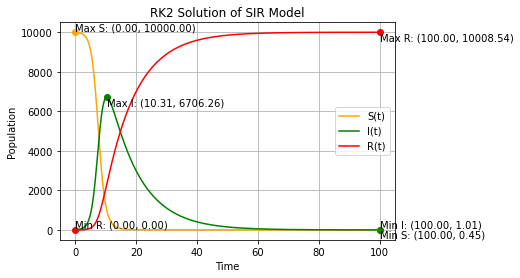

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
beta = 0.0001  # Infection rate
gamma = 0.1  # recovery rate
delta = 0.3  # vaccination rate
epsilon = 0.3  # vaccination efficacy
omega = 0  # 

# Initial conditions
S0 = 10000  # Initial susceptible population
I0 = 10  # Initial infected population
R0 = 0.0  # Initial recovered population
y0 = [S0, I0, R0]

# Time points
t = np.linspace(0, 100, 1000) 
dt = t[1] -t[0]

params = (beta, gamma, delta, epsilon, omega)

SIR_RK2_extension_plot(ode_system_2, t, y0, (0.0001, 0.1, 0.3, 0, 0))